# Pré-processamento

In [1]:
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import nltk

products_data = pd.read_csv('produtos.csv', delimiter=';')
print(products_data.groupby('categoria').size())

/home/celesde/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):
/home/celesde/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidanc

categoria
brinquedo    1020
game         1020
livro        1020
maquiagem    1020
dtype: int64


In [2]:
products_data.head()

,nome,descricao,categoria
0,O Hobbit - 7ª Ed. 2013,Produto NovoBilbo Bolseiro é um hobbit que lev...,livro
1,Livro - It A Coisa - Stephen King,Produto NovoDurante as férias escolares de 195...,livro
2,Box As Crônicas De Gelo E Fogo Pocket 5 Li...,Produto NovoTodo o reino de Westeros ao alcanc...,livro
3,Box Harry Potter,Produto Novo e Físico A série Harry Potter ch...,livro
4,Livro Origem - Dan Brown,Produto NovoDe Onde Viemos? Para Onde Vamos? R...,livro


In [3]:
# concatenando as colunas nome e descricao
products_data['informacao'] = products_data['nome'] + products_data['descricao']

# excluindo linhas com valor de informacao ou categoria NaN
products_data.dropna(subset=['informacao', 'categoria'], inplace=True)
#products_data.drop(columns = '')
y = products_data.drop(columns=['nome', 'descricao', 'informacao'])
X = products_data.drop(columns=['nome', 'descricao', 'categoria'])

print(y.head())
print(X.head())

  categoria
0     livro
1     livro
2     livro
3     livro
4     livro
                                          informacao
0   O Hobbit - 7ª Ed. 2013 Produto NovoBilbo Bols...
1   Livro - It A Coisa - Stephen King Produto Nov...
2   Box  As Crônicas De Gelo E Fogo  Pocket  5 Li...
3   Box Harry Potter Produto Novo e Físico  A sér...
4   Livro Origem - Dan Brown Produto NovoDe Onde ...


### 29% do dataframe foi removido, porém não é possível utilizar detalhes sem classificação ou classificação sem detalhes. 

In [4]:
print(products_data.groupby('categoria').size())

categoria
brinquedo    668
game         622
livro        838
maquiagem    788
dtype: int64


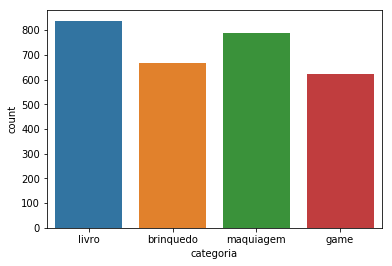

In [5]:
import seaborn as sns
sns.countplot(products_data['categoria'],label="Count")
# não esta balanceado mas pode ser melhorado posteriormente.
plt.show()

In [6]:
from nltk.corpus import stopwords
stop_words=set(stopwords.words("portuguese"))

# transforma a string em caixa baixa e remove stopwords
X['sem_stopwords'] = X['informacao'].str.lower().apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
print(X['sem_stopwords'].head())

0    hobbit - 7ª ed. 2013 produto novobilbo bolseir...
1    livro - it coisa - stephen king produto novodu...
2    box crônicas gelo fogo pocket 5 livros produto...
3    box harry potter produto novo físico série har...
4    livro origem - dan brown produto novode onde v...
Name: sem_stopwords, dtype: object


### Não é necessário fazer separação visto que count vectorize já faz isso posteriormente
porém é válida para visualização da ocorrência de cada palavra (:

In [7]:
tokenizer = nltk.RegexpTokenizer(r"\w+")
X['tokens'] = X['sem_stopwords'].apply(tokenizer.tokenize) # aplica o regex tokenizer
print(X['tokens'].head())

from nltk.probability import FreqDist
fdist = X['tokens'].apply(FreqDist) # calcula a frequência de cada token
print(fdist.head()) # frequencia na coluna sem stop_words


0    [hobbit, 7ª, ed, 2013, produto, novobilbo, bol...
1    [livro, it, coisa, stephen, king, produto, nov...
2    [box, crônicas, gelo, fogo, pocket, 5, livros,...
3    [box, harry, potter, produto, novo, físico, sé...
4    [livro, origem, dan, brown, produto, novode, o...
Name: tokens, dtype: object
0    {'hobbit': 2, '7ª': 1, 'ed': 1, '2013': 2, 'pr...
1    {'livro': 1, 'it': 2, 'coisa': 5, 'stephen': 2...
2    {'box': 2, 'crônicas': 3, 'gelo': 3, 'fogo': 3...
3    {'box': 2, 'harry': 26, 'potter': 21, 'produto...
4    {'livro': 1, 'origem': 2, 'dan': 1, 'brown': 2...
Name: tokens, dtype: object


### A impressão acima mostra a frequência das palavras após tratamentos para lowercase e sem stopwords. Abaixo segue as listas sem tratamentos.

In [8]:
fdist_comstop = X['informacao'].apply(tokenizer.tokenize).apply(FreqDist)
print(fdist_comstop.head()) # Frequencia na coluna com stop_words

0    {'O': 1, 'Hobbit': 1, '7ª': 1, 'Ed': 1, '2013'...
1    {'Livro': 1, 'It': 2, 'A': 3, 'Coisa': 5, 'Ste...
2    {'Box': 2, 'As': 1, 'Crônicas': 3, 'De': 1, 'G...
3    {'Box': 1, 'Harry': 26, 'Potter': 21, 'Produto...
4    {'Livro': 1, 'Origem': 2, 'Dan': 1, 'Brown': 2...
Name: informacao, dtype: object


In [9]:
X.head()

,informacao,sem_stopwords,tokens
0,O Hobbit - 7ª Ed. 2013 Produto NovoBilbo Bols...,hobbit - 7ª ed. 2013 produto novobilbo bolseir...,"[hobbit, 7ª, ed, 2013, produto, novobilbo, bol..."
1,Livro - It A Coisa - Stephen King Produto Nov...,livro - it coisa - stephen king produto novodu...,"[livro, it, coisa, stephen, king, produto, nov..."
2,Box As Crônicas De Gelo E Fogo Pocket 5 Li...,box crônicas gelo fogo pocket 5 livros produto...,"[box, crônicas, gelo, fogo, pocket, 5, livros,..."
3,Box Harry Potter Produto Novo e Físico A sér...,box harry potter produto novo físico série har...,"[box, harry, potter, produto, novo, físico, sé..."
4,Livro Origem - Dan Brown Produto NovoDe Onde ...,livro origem - dan brown produto novode onde v...,"[livro, origem, dan, brown, produto, novode, o..."


## Stemmer.
Extrai o sufixo das palavras, usado para facilitar a associação entre palavras com sentidos próximos.


Precisão razoável.


Por exemplo:


In [10]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("portuguese")

In [11]:
print(stemmer.stem("livro"))
print(stemmer.stem("livreiro"))
print(stemmer.stem("livraria"))

livr
livreir
livr


In [12]:
X['stemmed'] = X['tokens'].apply(lambda x: [stemmer.stem(y) for y in x]) # Aplica o stemmer pra cada palavra
X = X.drop(columns=['sem_stopwords']) # Exclui a coluna sem o stemmer

In [13]:
X.head() # Mostra o dataframe

,informacao,tokens,stemmed
0,O Hobbit - 7ª Ed. 2013 Produto NovoBilbo Bols...,"[hobbit, 7ª, ed, 2013, produto, novobilbo, bol...","[hobbit, 7ª, ed, 2013, produt, novobilb, bolse..."
1,Livro - It A Coisa - Stephen King Produto Nov...,"[livro, it, coisa, stephen, king, produto, nov...","[livr, it, cois, stephen, king, produt, novodu..."
2,Box As Crônicas De Gelo E Fogo Pocket 5 Li...,"[box, crônicas, gelo, fogo, pocket, 5, livros,...","[box, crônic, gel, fog, pocket, 5, livr, produ..."
3,Box Harry Potter Produto Novo e Físico A sér...,"[box, harry, potter, produto, novo, físico, sé...","[box, harry, pott, produt, nov, físic, séri, h..."
4,Livro Origem - Dan Brown Produto NovoDe Onde ...,"[livro, origem, dan, brown, produto, novode, o...","[livr, orig, dan, brown, produt, novod, onde, ..."


In [14]:
X = X.drop(columns=['informacao']) # Exclui as colunas antigas

### passo opcional: 
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

X['stemmed'] = X['stemmed'].apply(lambda col: le.fit_transform(col)) # transforma as palavras em inteiros
print(X['stemmed'].head(10))

y = le.fit_transform(y) # transforma cada categoria em um inteiro

In [15]:
fdist = X['stemmed'].apply(FreqDist) # calcula a frequência de cada token
print(fdist.head(10))

0    {'hobbit': 2, '7ª': 1, 'ed': 1, '2013': 2, 'pr...
1    {'livr': 1, 'it': 2, 'cois': 5, 'stephen': 2, ...
2    {'box': 2, 'crônic': 3, 'gel': 3, 'fog': 3, 'p...
3    {'box': 2, 'harry': 26, 'pott': 21, 'produt': ...
4    {'livr': 1, 'orig': 2, 'dan': 1, 'brown': 2, '...
5    {'escur': 2, 'cinquent': 1, 'tons': 1, 'olhos'...
6    {'silmarillion': 2, '5ª': 1, 'ed': 1, '2011': ...
7    {'pequen': 2, 'princip': 1, 'príncip': 1, 'per...
8    {'ed': 6, 'lorrain': 6, 'warren': 6, 'demonolo...
9    {'box': 2, 'franz': 2, 'kafk': 5, '1883': 1, '...
Name: stemmed, dtype: object


In [16]:
X["strings"]= X["stemmed"].str.join(" ") # reunindo cada elemento da lista
X.head()

,tokens,stemmed,strings
0,"[hobbit, 7ª, ed, 2013, produto, novobilbo, bol...","[hobbit, 7ª, ed, 2013, produt, novobilb, bolse...",hobbit 7ª ed 2013 produt novobilb bolseir hobb...
1,"[livro, it, coisa, stephen, king, produto, nov...","[livr, it, cois, stephen, king, produt, novodu...",livr it cois stephen king produt novodur fér e...
2,"[box, crônicas, gelo, fogo, pocket, 5, livros,...","[box, crônic, gel, fog, pocket, 5, livr, produ...",box crônic gel fog pocket 5 livr produt novoto...
3,"[box, harry, potter, produto, novo, físico, sé...","[box, harry, pott, produt, nov, físic, séri, h...",box harry pott produt nov físic séri harry pot...
4,"[livro, origem, dan, brown, produto, novode, o...","[livr, orig, dan, brown, produt, novod, onde, ...",livr orig dan brown produt novod onde viem ond...


## Separando os dados em treino e teste
80% para treino e 20% para teste

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

X_train,X_test,y_train,y_test = train_test_split(
    X["strings"], 
    y["categoria"], 
    test_size = 0.2, 
    random_state = 10
)

vect = CountVectorizer()
vect.fit(X["strings"])

dataset = {
    "X_train": vect.transform(X_train),
    "X_test": vect.transform(X_test),
    "y_train": y_train,
    "y_test" : y_test,
    "vect": vect
}

## Treino

In [18]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(dataset["X_train"], dataset["y_train"])

products_model = {
    "clf" : clf,
    "vect": dataset["vect"]
}

build three predictive models: 1) Decision Tree, 2) Random Forest, and 3) Gradient Boost;
assess the predictive power of these models and select the most superior one.

# Testes

In [19]:
from sklearn.metrics import accuracy_score
y_prediction = products_model["clf"].predict(dataset["X_test"])

accuracy = accuracy_score(y_prediction, dataset["y_test"])

print (accuracy)

products_metrics = accuracy

0.976027397260274


In [22]:
input_message = ["hobbit"]
input_message = products_model["vect"].transform(input_message)
final_prediction = products_model["clf"].predict(input_message)[0]


In [23]:
print("Predicted value: " + final_prediction)

Predicted value: livro
